In [8]:
# Change to the desired directory
import os
from IPython import get_ipython

# Specify the target directory
target_dir = r"E:\Github\Pneumonia\Chest_X-Ray_Pneumonia_PyTorch"

# Use %cd to change directory
get_ipython().run_line_magic('cd', target_dir)

E:\Github\Pneumonia\Chest_X-Ray_Pneumonia_PyTorch


C:\Users\maraw\AppData\Roaming\Python\Python311\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


# Loading the libraries needed

In [9]:
from pathlib import Path
from torchvision import transforms
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from pathlib import Path
from PIL import Image
from glob import glob

# Importing our data that has been resized before

In [10]:
df = pd.read_csv(r'E:\Github\Pneumonia\Chest_X-Ray_Pneumonia_PyTorch\df_resized.csv')

In [11]:
df

,img_path,clas,split,resized_path
0,data\chest_xray\test\NORMAL\IM-0001-0001.jpeg,NORMAL,test,data\chest_xray_resized\test\NORMAL\IM-0001-00...
1,data\chest_xray\test\NORMAL\IM-0003-0001.jpeg,NORMAL,test,data\chest_xray_resized\test\NORMAL\IM-0003-00...
2,data\chest_xray\test\NORMAL\IM-0005-0001.jpeg,NORMAL,test,data\chest_xray_resized\test\NORMAL\IM-0005-00...
3,data\chest_xray\test\NORMAL\IM-0006-0001.jpeg,NORMAL,test,data\chest_xray_resized\test\NORMAL\IM-0006-00...
4,data\chest_xray\test\NORMAL\IM-0007-0001.jpeg,NORMAL,test,data\chest_xray_resized\test\NORMAL\IM-0007-00...
...,...,...,...,...
5851,data\chest_xray\val\PNEUMONIA\person1949_bacte...,PNEUMONIA,val,data\chest_xray_resized\val\PNEUMONIA\person19...
5852,data\chest_xray\val\PNEUMONIA\person1950_bacte...,PNEUMONIA,val,data\chest_xray_resized\val\PNEUMONIA\person19...
5853,data\chest_xray\val\PNEUMONIA\person1951_bacte...,PNEUMONIA,val,data\chest_xray_resized\val\PNEUMONIA\person19...
5854,data\chest_xray\val\PNEUMONIA\person1952_bacte...,PNEUMONIA,val,data\chest_xray_resized\val\PNEUMONIA\person19...


In [12]:
from torchvision import transforms
# Augmentation pipeline for NORMAL images
augmentation = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1.0),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.3),
    transforms.RandomAffine(degrees=10, translate=(0.1, 0.1), scale=(0.9, 1.1)),
])

# Augment output dir
aug_output_dir = Path(r"E:\Github\Pneumonia\Chest_X-Ray_Pneumonia_PyTorch\data\chest_xray_augmented")
aug_output_dir.mkdir(parents=True, exist_ok=True)

# Select only NORMAL training images
df_normal = df[(df['split'] == 'train') & (df['clas'] == 'NORMAL')]

# Number of augmentations per image
num_aug_per_image = 3

augmented_rows = []

print("Augmenting NORMAL images...")
for idx, row in tqdm(df_normal.iterrows(), total=len(df_normal)):
    original_path = row['resized_path']
    img = Image.open(original_path).convert("L")

    for i in range(num_aug_per_image):
        aug_img = augmentation(img)
        new_filename = f"{Path(original_path).stem}_aug{i}.jpeg"
        new_path = aug_output_dir / new_filename

        aug_img.save(new_path)

        augmented_rows.append({
            'img_path': str(new_path),
            'resized_path': str(new_path),
            'split': 'train',
            'clas': 'NORMAL'
        })

# Add augmented samples to df
df_augmented = pd.DataFrame(augmented_rows)
df = pd.concat([df, df_augmented], ignore_index=True)

Augmenting NORMAL images...


100%|██████████| 1341/1341 [00:12<00:00, 104.79it/s]


In [13]:
df.to_csv(r'E:\Github\Pneumonia\Chest_X-Ray_Pneumonia_PyTorch\df_resized_aug.csv', index=False)

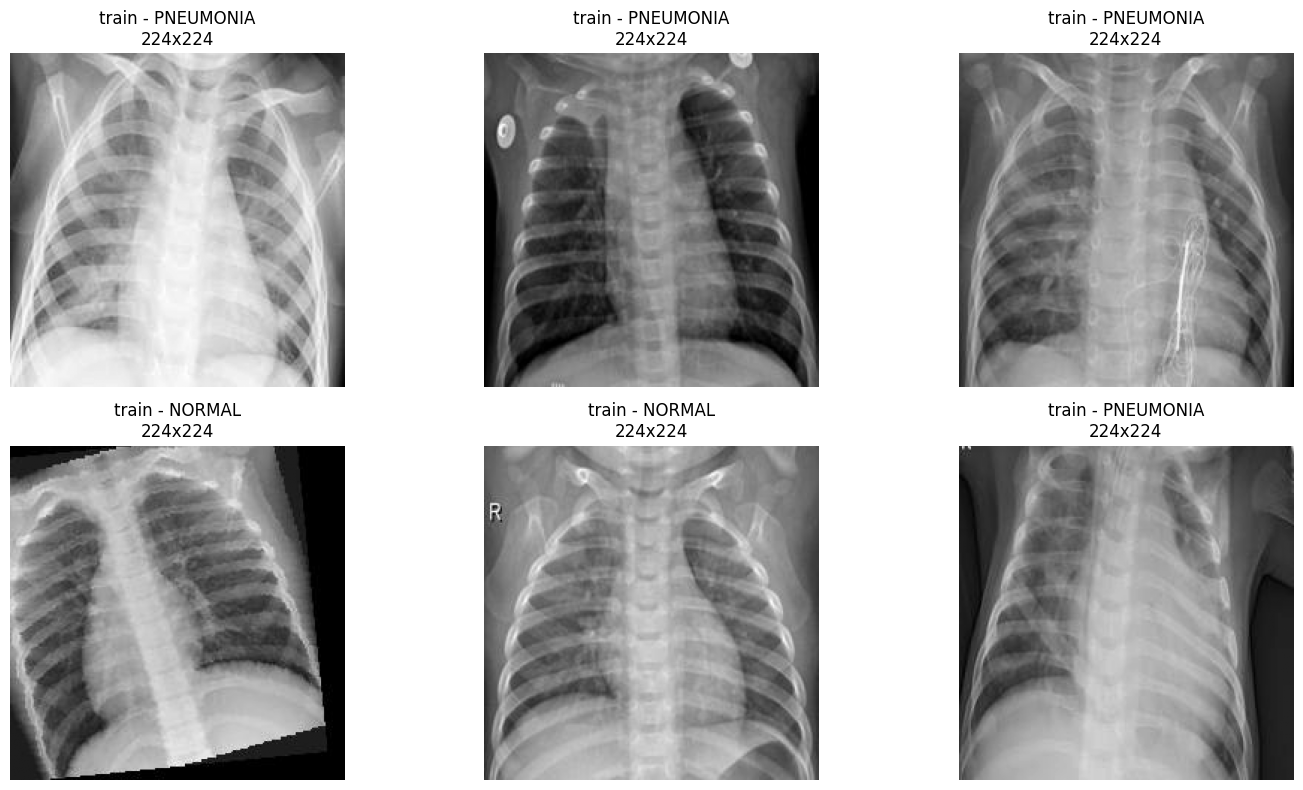

In [14]:
# Sample 6 random images from the DataFrame
sample_df = df.sample(6)

# Set up a subplot
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for ax, (_, row) in zip(axes.flatten(), sample_df.iterrows()):
    img = Image.open(row['resized_path'])
    ax.imshow(img, cmap='gray')  # Chest X-rays are grayscale
    ax.set_title(f"{row['split']} - {row['clas']}\n{img.size[0]}x{img.size[1]}")
    ax.axis('off')

plt.tight_layout()
plt.show()